In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

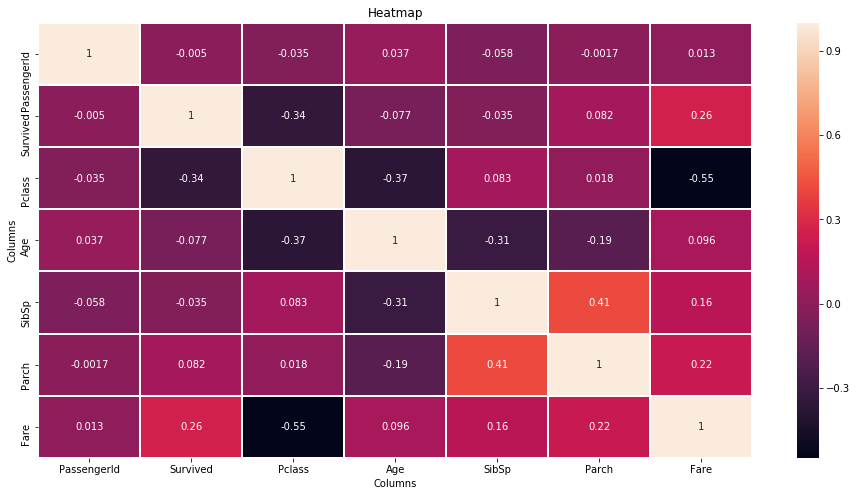

In [15]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), annot=True, linewidths=1, linecolor='w')
plt.xlabel('Columns')
plt.ylabel('Columns')
plt.title('Heatmap')
plt.savefig('heatmap.png')

In [16]:
training_data = data[['PassengerId','Pclass','Fare',]]

In [17]:
output_data = data['Survived']

In [18]:
from sklearn.model_selection import train_test_split

In [94]:
X, x_test,Y, y_test = train_test_split(training_data, output_data, test_size=0.3, random_state=150)

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
model = LogisticRegression()

In [97]:
model.fit(X,Y)

C:\Users\KS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [98]:
predictions = model.predict(x_test)

In [99]:
predictions[:5]

array([0, 0, 1, 0, 0], dtype=int64)

In [100]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [101]:
score = accuracy_score(predictions, y_test)

In [102]:
score

0.7164179104477612

# Prediction on test data

In [32]:
test_data = pd.read_csv('test.csv')

In [33]:
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [34]:
test_data = test_data[['PassengerId','Pclass','Fare']]

In [35]:
test_data.head(2)

,PassengerId,Pclass,Fare
0,892,3,7.8292
1,893,3,7.0000


In [36]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Fare           1
dtype: int64

In [37]:
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

In [38]:
test_data.isnull().sum()

PassengerId    0
Pclass         0
Fare           0
dtype: int64

In [103]:
test_predictions = model.predict(test_data)

In [104]:
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': test_predictions
})

In [105]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [106]:
submission = submission.set_index('PassengerId')

In [107]:
submission.to_csv('files_to_be_submitted.csv')